# Image Augmentation

In [99]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [100]:
train_datagen=ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [101]:
test_datagen=ImageDataGenerator(rescale=1/255)

In [102]:
x_train=train_datagen.flow_from_directory('C:\GEC College\CNN_Dataset\Training',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 1238 images belonging to 4 classes.


In [103]:
x_test=test_datagen.flow_from_directory('C:\GEC College\CNN_Dataset\Testing',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 326 images belonging to 4 classes.


In [104]:
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

# Import Libraries

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

# Create Model

In [106]:
model=Sequential()

# Add layers

In [107]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [108]:
model.add(Flatten())

In [87]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
flatten_2 (Flatten)          (None, 123008)            0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [109]:
#hidden Layer-1
model.add(Dense(300,activation='relu'))

In [110]:
#hidden Layer-2
model.add(Dense(150,activation='relu'))

In [111]:
#Output Layer
model.add(Dense(4,activation='softmax'))

# Compile Model

In [112]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Fit the model

In [113]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

Epoch 1/10
13/13 [==============================] - 52s 4s/step - loss: 9.4429 - accuracy: 0.2859 - val_loss: 3.4827 - val_accuracy: 0.2485
Epoch 2/10
13/13 [==============================] - 18s 1s/step - loss: 1.9161 - accuracy: 0.2948 - val_loss: 1.3532 - val_accuracy: 0.4141
Epoch 3/10
13/13 [==============================] - 18s 1s/step - loss: 1.2493 - accuracy: 0.4758 - val_loss: 1.0748 - val_accuracy: 0.5123
Epoch 4/10
13/13 [==============================] - 17s 1s/step - loss: 1.0044 - accuracy: 0.6082 - val_loss: 1.0896 - val_accuracy: 0.4755
Epoch 5/10
13/13 [==============================] - 17s 1s/step - loss: 0.8793 - accuracy: 0.6599 - val_loss: 0.6688 - val_accuracy: 0.7669
Epoch 6/10
13/13 [==============================] - 17s 1s/step - loss: 0.7515 - accuracy: 0.7068 - val_loss: 0.6231 - val_accuracy: 0.7393
Epoch 7/10
13/13 [==============================] - 18s 1s/step - loss: 0.6703 - accuracy: 0.7456 - val_loss: 0.6035 - val_accuracy: 0.7699
Epoch 8/10
13/13 [==

# Save  the model

In [1]:
model.save('bear.h5')

NameError: name 'model' is not defined

# Test the Model

In [118]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [122]:
model=load_model('bear.h5')
img=image.load_img(r'C:\GEC College\CNN_Dataset\Training\bears\9k_ (7).jpeg',target_size=(64,64))

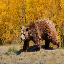

In [123]:
img

In [124]:
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [125]:
x=image.img_to_array(img)

In [126]:
x

array([[[208., 140.,  13.],
        [210., 148.,  27.],
        [187., 126.,  37.],
        ...,
        [221., 162.,  24.],
        [226., 158.,  23.],
        [204., 145.,  19.]],

       [[219., 147.,  13.],
        [221., 156.,  12.],
        [194., 131.,  18.],
        ...,
        [229., 166.,  35.],
        [215., 149.,  11.],
        [198., 136.,  15.]],

       [[240., 167.,  26.],
        [229., 160.,   4.],
        [233., 166.,  26.],
        ...,
        [207., 141.,  21.],
        [222., 156.,  18.],
        [222., 160.,  41.]],

       ...,

       [[168., 149., 117.],
        [165., 145., 112.],
        [170., 148., 111.],
        ...,
        [172., 153., 120.],
        [166., 140., 107.],
        [164., 143., 114.]],

       [[138., 126., 100.],
        [147., 133., 106.],
        [159., 144., 113.],
        ...,
        [155., 139., 106.],
        [170., 147., 115.],
        [181., 158., 126.]],

       [[113., 108.,  86.],
        [163., 157., 133.],
        [134., 1

In [127]:
x=np.expand_dims(x,axis=0)

In [66]:
x

array([[[[107., 111.,  14.],
         [ 93., 101.,  18.],
         [ 90., 102.,  40.],
         ...,
         [ 78.,  94.,  47.],
         [ 79.,  95.,  46.],
         [ 73.,  94.,  55.]],

        [[103., 106.,  25.],
         [ 63.,  70.,   2.],
         [ 72.,  82.,  29.],
         ...,
         [ 68.,  85.,  31.],
         [ 42.,  59.,   4.],
         [ 76., 103.,  10.]],

        [[137., 147.,  61.],
         [ 59.,  70.,   0.],
         [100., 113.,  43.],
         ...,
         [ 67.,  85.,  25.],
         [ 85., 103.,  45.],
         [ 47.,  65.,  13.]],

        ...,

        [[190., 182.,  84.],
         [152., 147.,  63.],
         [144., 148.,  61.],
         ...,
         [165., 170.,  78.],
         [175., 179.,  94.],
         [169., 173.,  96.]],

        [[152., 150.,  67.],
         [139., 138.,  45.],
         [181., 180.,  87.],
         ...,
         [184., 183., 100.],
         [186., 189., 100.],
         [169., 163.,  85.]],

        [[196., 194., 111.],
       

In [128]:
pred=model.predict_classes(x)

In [69]:
pred

array([2], dtype=int64)

In [129]:
index=['bears','crows','elephants','rats']

In [130]:
print(index[pred[0]])

bears


In [131]:
x.ndim

4

In [132]:
x.shape

(1, 64, 64, 3)